%%In this project, we investigate the factors that affect the bike sharing demand. The data is download from https://www.kaggle.com/c/bike-sharing-demand/data. 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import calendar
from datetime import datetime 


%%Load data from "ShareBike.csv" 

In [3]:
Bike=pd.read_csv("ShareBike.csv")

%%Check the data set if it is complete.  This data set is in good condition and we don't need to clean it.

In [30]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
datetime        10886 non-null object
season          10886 non-null int64
holiday         10886 non-null int64
workingday      10886 non-null int64
casual          10886 non-null int64
registered      10886 non-null int64
count           10886 non-null int64
season_label    10886 non-null object
hour            10886 non-null object
dtypes: int64(6), object(3)
memory usage: 765.5+ KB


In [5]:
Bike.head(5)

,datetime,season,holiday,workingday,casual,registered,count
0,2011/1/1 0:00,1,0,0,3,13,16
1,2011/1/1 1:00,1,0,0,8,32,40
2,2011/1/1 2:00,1,0,0,5,27,32
3,2011/1/1 3:00,1,0,0,3,10,13
4,2011/1/1 4:00,1,0,0,0,1,1


%%Mapping the season index into ['Spring' 'Summer' 'Fall' 'Winter']

In [14]:
Bike["season_label"] = Bike.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })


%%Extract the hour from the datetime

In [29]:
Bike["hour"]=Bike.datetime.apply(lambda x: x.split()[1].split(":")[0])
Bike

,datetime,season,holiday,workingday,casual,registered,count,season_label,hour
0,2011/1/1 0:00,1,0,0,3,13,16,Spring,0
1,2011/1/1 1:00,1,0,0,8,32,40,Spring,1
2,2011/1/1 2:00,1,0,0,5,27,32,Spring,2
3,2011/1/1 3:00,1,0,0,3,10,13,Spring,3
4,2011/1/1 4:00,1,0,0,0,1,1,Spring,4
5,2011/1/1 5:00,1,0,0,0,1,1,Spring,5
6,2011/1/1 6:00,1,0,0,2,0,2,Spring,6
7,2011/1/1 7:00,1,0,0,1,2,3,Spring,7
8,2011/1/1 8:00,1,0,0,1,7,8,Spring,8
9,2011/1/1 9:00,1,0,0,8,6,14,Spring,9


In [20]:
Bike.dtypes

datetime        object
season           int64
holiday          int64
workingday       int64
casual           int64
registered       int64
count            int64
season_label    object
hour            object
dtype: object

%% See how is the demand of bikes in each season

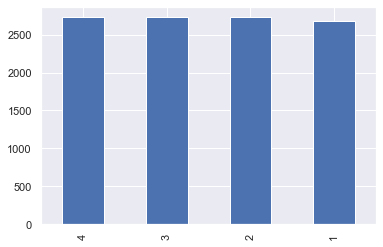

In [21]:
SensonCount = ShareBike["season"].value_counts()
SensonCount.sort_values(ascending=False)
SensonCount.plot(kind="bar")

%% See how is the demand of bikes in each hour of each season

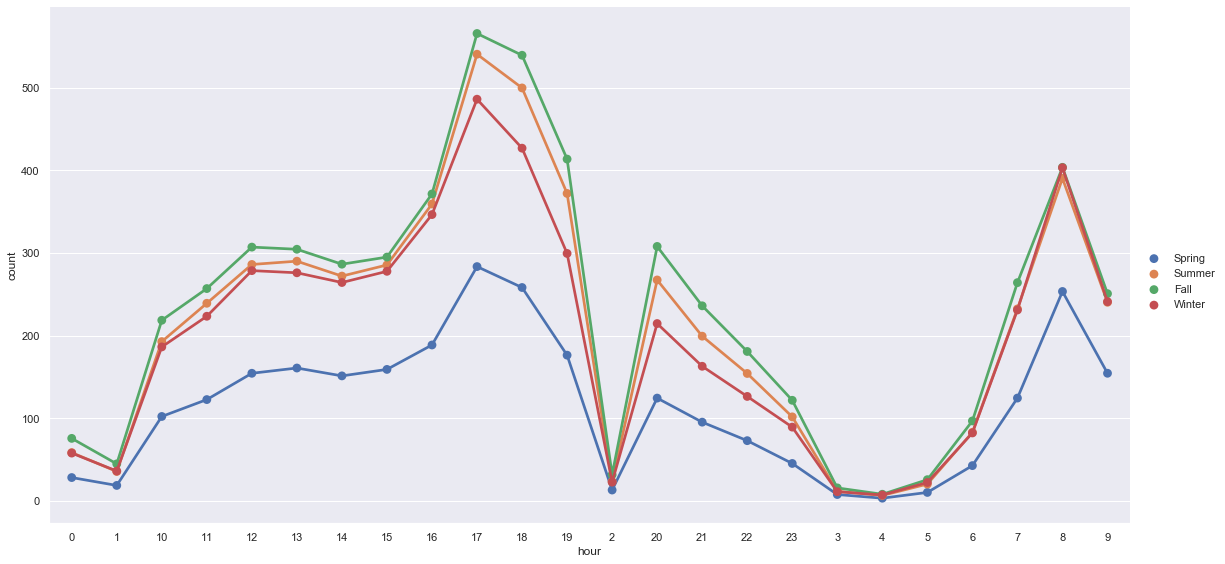

In [28]:
sns.FacetGrid(data=Bike,height=8,aspect=2.0).\
map(sns.pointplot,'hour','count','season_label',palette="deep",ci=None).\
add_legend()

plt.show()

%% This result indicates the season won't affect the demand of bikes at each hour of per day. This is happened because people need to work almost  at season.

%% Load another data set which contains the weather info

In [6]:
Weather=pd.read_csv("Weather.csv")

In [12]:
Weather.head(5)

,datetime,season,temp,atemp,humidity,windspeed
0,2011/1/1 0:00,1,9.84,14.395,81,0.0
1,2011/1/1 1:00,1,9.02,13.635,80,0.0
2,2011/1/1 2:00,1,9.02,13.635,80,0.0
3,2011/1/1 3:00,1,9.84,14.395,75,0.0
4,2011/1/1 4:00,1,9.84,14.395,75,0.0


In [8]:
Weather.shape

(10886, 6)

%% Merge the above two data sets 

In [9]:
ShareBike=pd.merge(Bike, Weather)

In [10]:
ShareBike.head()

,datetime,season,holiday,workingday,casual,registered,count,temp,atemp,humidity,windspeed
0,2011/1/1 0:00,1,0,0,3,13,16,9.84,14.395,81,0.0
1,2011/1/1 1:00,1,0,0,8,32,40,9.02,13.635,80,0.0
2,2011/1/1 2:00,1,0,0,5,27,32,9.02,13.635,80,0.0
3,2011/1/1 3:00,1,0,0,3,10,13,9.84,14.395,75,0.0
4,2011/1/1 4:00,1,0,0,0,1,1,9.84,14.395,75,0.0


In [11]:
ShareBike.shape

(10886, 11)

%% Investigate the correlation of each

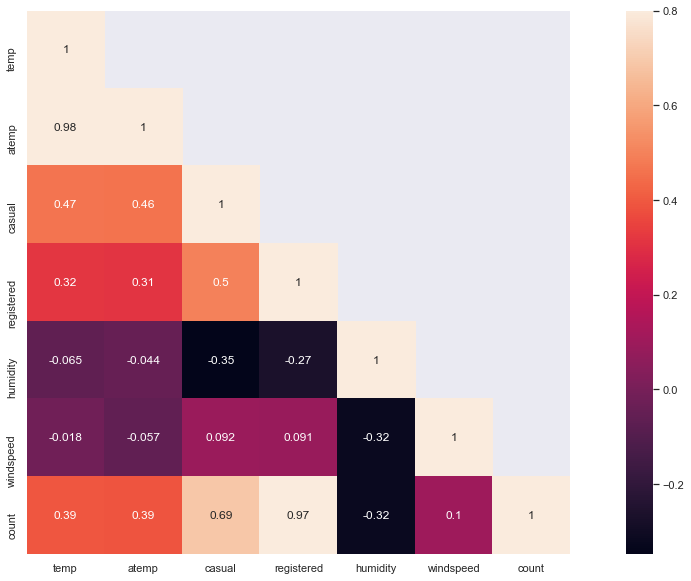

In [19]:
correlation = ShareBike[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(correlation, mask=mask,vmax=.8, square=True,annot=True)

plt.show()

%% count is positively related with registered and casual with correlation coefficients being 0.69 and 0.97。Since count = casual + registered ，this result can be anticipated.

count is positively related with temp with correlation coefficient being 0.39。The reason behind might be that people don't want to ride if it is cold outside.

